H1 Calculator for eV62

Torque, Power, Current and Efficiency calculator for eV conversion of 62-series Land Cruiser.

Torque Converter function ref: 
- http://jmclutch.com/site/book/export/html/7 
- https://web.mit.edu/2.972/www/reports/torque_converter/torque_converter.htm
> speed ratio == output rpm/input rpm\
> Torque multiplication: Torque multiplication = -2*speed ratio + 2.2, input rpm<sub>0</sub> = 2200\
 >PowerTC<sub>out</sub> = PowerTC<sub>in</sub> * TC Efficiency\
 >TC Efficiency by Lookup table TCeff

P135 Characteristics
 >Continuous Torque: 
 >>rpm <=5000: 170  (Nm)\
 >>rpm > 5000: 170-(rpm-5000)*.0025\
 >Maximum Torque:\
 >>rpm <= 2750: 320 (Nm)\
 >>rpm >  2750: 320-(rpm-2750)*0.03\
 
 Physics:
* Required motor Torque (Nm) for accel = mass (kg) * acceleration (m/s/s) * Radius (m) / gear ratio
* Power (W) = Torque (Nm) * angular speed (rads/s)
<br>
* angular speed (rad/s) = 2$\pi$ * 60 * rpm
* angular speed (rpm) = 0.10472 anglular speed rads/s
* v<sub>i</sub> = v<sub>i-1</sub> + a*t  
* F<sub>net</sub> = T*r - R<sub>rolling</sub> - F<sub>drag</sub> - F<sub>grade</sub>
 * R<sub>rolling</sub> = c*m*g ,  c = 0.011
 * F<sub>drag</sub> = 0.5*D<sub>air</sub>*v<sup>2</sup>*A*C<sub>drag</sub>     * C<sub>drag</sub> = .33, A = 3.6m<sup>2</sup>
 * F<sub>grade</sub> = mgSin(theta)
  * theta = grade% * 100 * .57 * pi/180
  * theta<sub>6%</sub> = 3.420 deg * pi/180




<h>Basic Library and variable definition</h>


     RPM  ContinT   MaxT        ContinP
0      0   170.00  320.0       0.000000
1    100   170.00  320.0    1780.328418
2    200   170.00  320.0    3560.656836
3    300   170.00  320.0    5340.985255
4    400   170.00  320.0    7121.313673
..   ...      ...    ...            ...
73  7300   164.25  183.5  125568.134216
74  7400   164.00  180.5  127094.504021
75  7500   163.75  177.5  128615.637567
76  7600   163.50  174.5  130131.534853
77  7700   163.25  171.5  131642.195878

[78 rows x 4 columns]


<AxesSubplot:>

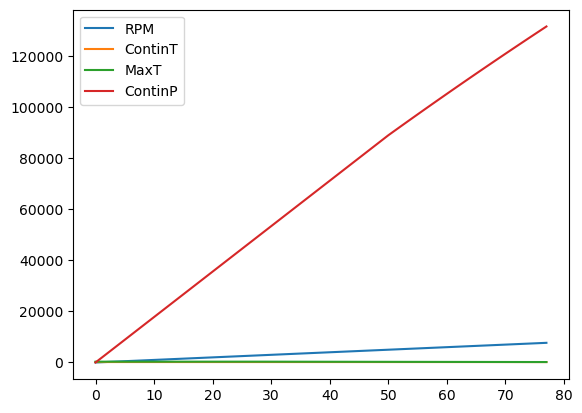

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import lib.core as core


eVaMass = 2300
tireWidth = 265
tireRatio = 70
tireRim = 18
tireDia = tireWidth/25.4*tireRatio*.2+tireRim # tire dia in in
tireRadius = tireDia*.0254/2  # tire radius in meters
tireRevPerMile = tireDia/.0254*19.1
diffG = 4.11
A343F=[2.757,1.531,1,0.75]
H42=[2.866,2.3,1.4,1]
TCRatio = 2.8
TCLockupRPM = 2750
TCeff = {0:0,.1:.2,.3:.6,.4:.7,.5:.8,.6:.9}
TCmult = 2.4 - .2*TCRatio
rpm = 0
i = 0

#PP135=pd.DataFrame({'RPM':[0],
#                 'ContinT':[175],
#                'MaxT':[320],
#                 'ContinP':[0],
#                 'MaxP':[0],
#                 'Velocity':[0]   
#                   })


#while rpm<7701:
#    contT = core.continuous_torque(rpm)
#    maxT = core.max_torque(rpm)
#    contP = contT * rpm /9.5488
#    maxP = maxT * rpm / 9.5488
   # rpmlist.insert(i,rpm)
   # contTlist.insert(i,contT)
   # contPlist.insert(i,contP)
   # maxTlist.insert(i,maxT)
   # maxPlist.insert(i,maxP)
#    i=i+1
#   rpm = rpm+100
    #RPM_row = {'RPM':rpm,'ContinT':contT,'MaxT':maxT,'ContinP':contP,'MaxP':maxP}
#    RPM_row = [rpm,contT,maxT,contP,maxP]
#    PP135.loc[str(i)]=RPM_row           

#plt.plot(contTlist,color='magenta',marker='o',mfc='pink')
#plt.xticks(range(0,8000,1000))
#plt.ylabel('contT')
#plt.xlabel('rpm')
#plt.show()

#NRADF = pd.read_html('https://www.ssa.gov/oact/progdata/nra.html')

rpms = list(range(0, 7701, 100))
# todo: why can I pass the function literal to map for maxT but a need a lambda for continuousT
contTs = map(lambda x: core.continuous_torque(x), rpms)
maxTs = map(core.max_torque, rpms)
contPs = map(lambda x: core.continuous_power(x), rpms)
maxPs = map(lambda x: core.max_power(x), rpms)
velocities = map(lambda: 0, rpms)

PP135=pd.DataFrame({
    'RPM': pd.Series(rpms),
    'ContinT': pd.Series(contTs),
    'MaxT': pd.Series(maxTs),
    'ContinP': pd.Series(contPs),
    #'MaxP': pd.Series(maxPs),
    #'Velocity': pd.Series(velocities)
})


print(PP135)
PP135.plot()

In [13]:
print(PP135)

     RPM  ContinT   MaxT        ContinP
0      0   170.00  320.0       0.000000
1    100   170.00  320.0    1780.328418
2    200   170.00  320.0    3560.656836
3    300   170.00  320.0    5340.985255
4    400   170.00  320.0    7121.313673
..   ...      ...    ...            ...
73  7300   164.25  183.5  125568.134216
74  7400   164.00  180.5  127094.504021
75  7500   163.75  177.5  128615.637567
76  7600   163.50  174.5  130131.534853
77  7700   163.25  171.5  131642.195878

[78 rows x 4 columns]


For ad hoc testing.

In [15]:
import lib.core
core.continuous_torque_at_rpm(5000)

157.5